# Pair Programming Limpieza I


Hipótesis

- La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

- El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

- Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

- Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.


In [1]:
import pandas as pd
import numpy as np

from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
df = pd.read_csv("datos/bank-additional-full.csv", index_col=0)

In [3]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"



Entre las tareas que tendréis que hacer hoy:

1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.


In [4]:
def exploracion(dataframe, nombre):
    print(f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print('---------')

    print(f"El dataframe tiene las siguientes columnas:")

    for col in dataframe.columns:
        print(col) 
    print("--------------")

    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe().T)
    print("--------------")

    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include=object).T)
    print("--------------")

    print("El numero de valores distintos de cada columna es:")
    for col in dataframe.columns:
            print(col, len(dataframe[col].value_counts()))

    print(f"Los valores únicos del dataframe son: {dataframe.unique()}")
    print("--------------")

    print(f"Hay {dataframe.duplicated().sum()} filas duplicadas.")
    print("--------------")  

    print("A continuación el resultado del método .info():")
    dataframe.info()

In [5]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [6]:
# para ver todas las columnas

pd.options.display.max_columns = None

In [7]:
print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataframe tiene 43170 filas y 20 columnas


In [8]:
# for loop para sacar las columnas

for col in df.columns:
        print(col) 

age
job
marital
education
default
housing
loan
contact
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y
month_day_week


In [9]:
# otro método

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'month_day_week'],
      dtype='object')

In [10]:
print(f"Los principales estadísticos de las variables numéricas son:")
display(df.describe().T)
print("--------------")


print(f"Los principales estadísticos de las variables categóricas son:")
display(df.describe(include=object).T)
print("--------------")

Los principales estadísticos de las variables numéricas son:


,count,mean,std,min,25%,50%,75%,max
age,43170.0,40.014918,10.407327,17.0,32.0,38.0,47.0,98.0
default,34154.0,0.000088,0.009372,0.0,0.0,0.0,0.0,1.0
housing,42139.0,0.535869,0.498718,0.0,0.0,1.0,1.0,1.0
loan,42139.0,0.155652,0.362529,0.0,0.0,0.0,0.0,1.0
duration,43170.0,257.883739,259.393738,0.0,102.0,179.0,319.0,4918.0
campaign,43170.0,2.564675,2.768538,1.0,1.0,2.0,3.0,56.0
pdays,43170.0,962.452282,186.962379,0.0,999.0,999.0,999.0,999.0
previous,43170.0,0.173639,0.496750,0.0,0.0,0.0,0.0,7.0
emp.var.rate,43170.0,0.078177,1.572217,-3.4,-1.8,1.1,1.4,1.4


--------------
Los principales estadísticos de las variables categóricas son:


,count,unique,top,freq
job,42823,11,admin.,10918
marital,43085,3,MARRIED,26105
education,41355,7,university.degree,12766
contact,43170,2,cellular,27438
poutcome,43170,3,NONEXISTENT,37261
cons.price.idx,43170,26,"93,994",8117
cons.conf.idx,43170,26,"-36,4",8117
euribor3m,43170,316,"4,857",3002
nr.employed,43170,11,"5228,1",16981
y,43170,2,no,38308


--------------


In [11]:
col_cat = df.select_dtypes(include = "object")
col_cat.head()

,job,marital,education,contact,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,housemaid,MARRIED,basic.4y,telephone,NONEXISTENT,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,services,MARRIED,high.school,telephone,NONEXISTENT,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,services,MARRIED,high.school,telephone,NONEXISTENT,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,admin.,MARRIED,basic.6y,telephone,NONEXISTENT,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,services,MARRIED,high.school,telephone,NONEXISTENT,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [12]:
# para los valores únicos de todas las columnas

for col in col_cat.columns:
    print("----------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(df[col].unique())
    print("\n", "----------------------------------------------", "\n")

---------------------------------------------------- 

En la columna job tenemos los siguientes valores unicos
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna marital tenemos los siguientes valores unicos
['MARRIED' 'SINGLE' 'DIVORCED' nan]

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna education tenemos los siguientes valores unicos
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna contact tenemos los siguientes valores unicos
['telephone' 'cellular']

 ---------------------------------------------- 

-------------------------

In [13]:
for col in col_cat.columns:
    print("----------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(pd.DataFrame(df[col].value_counts()))
    print("\n", "----------------------------------------------", "\n")

---------------------------------------------------- 

En la columna job tenemos los siguientes valores unicos
                 job
admin.         10918
blue-collar     9696
technician      7059
services        4173
management      3066
retired         1792
entrepreneur    1527
self-employed   1491
housemaid       1126
unemployed      1065
student          910

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna marital tenemos los siguientes valores unicos
          marital
MARRIED     26105
SINGLE      12147
DIVORCED     4833

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna education tenemos los siguientes valores unicos
                     education
university.degree        12766
high.school               9967
basic.9y                  6331
professional.course       5497
basic.4y                  4376
basic.6y                  2400
illiterate    

In [14]:
numericas = df.select_dtypes(include = 'int64')
numericas.head(5)

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0


In [15]:
for col in col_cat.columns:
    print("----------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(df[col].unique())
    print("\n", "----------------------------------------------", "\n")

---------------------------------------------------- 

En la columna job tenemos los siguientes valores unicos
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna marital tenemos los siguientes valores unicos
['MARRIED' 'SINGLE' 'DIVORCED' nan]

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna education tenemos los siguientes valores unicos
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna contact tenemos los siguientes valores unicos
['telephone' 'cellular']

 ---------------------------------------------- 

-------------------------

In [16]:
for col in col_cat.columns:
    print("----------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(pd.DataFrame(df[col].value_counts()))
    print("\n", "----------------------------------------------", "\n")

---------------------------------------------------- 

En la columna job tenemos los siguientes valores unicos
                 job
admin.         10918
blue-collar     9696
technician      7059
services        4173
management      3066
retired         1792
entrepreneur    1527
self-employed   1491
housemaid       1126
unemployed      1065
student          910

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna marital tenemos los siguientes valores unicos
          marital
MARRIED     26105
SINGLE      12147
DIVORCED     4833

 ---------------------------------------------- 

---------------------------------------------------- 

En la columna education tenemos los siguientes valores unicos
                     education
university.degree        12766
high.school               9967
basic.9y                  6331
professional.course       5497
basic.4y                  4376
basic.6y                  2400
illiterate    

In [17]:
# información completa dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43170 entries, 0 to 29612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43170 non-null  int64  
 1   job             42823 non-null  object 
 2   marital         43085 non-null  object 
 3   education       41355 non-null  object 
 4   default         34154 non-null  float64
 5   housing         42139 non-null  float64
 6   loan            42139 non-null  float64
 7   contact         43170 non-null  object 
 8   duration        43170 non-null  int64  
 9   campaign        43170 non-null  int64  
 10  pdays           43170 non-null  int64  
 11  previous        43170 non-null  int64  
 12  poutcome        43170 non-null  object 
 13  emp.var.rate    43170 non-null  float64
 14  cons.price.idx  43170 non-null  object 
 15  cons.conf.idx   43170 non-null  object 
 16  euribor3m       43170 non-null  object 
 17  nr.employed     43170 non-null 


2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.


In [18]:
nuevas_columnas = {col: col.replace (".", ",").lower() for col in df.columns}

In [19]:
df.rename(columns = nuevas_columnas, inplace = True)

In [20]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"



3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.


In [21]:
print(f"Hay {df.duplicated().sum()} filas duplicadas.")

Hay 1994 filas duplicadas.


In [22]:
df.drop_duplicates(inplace = True)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [23]:
print(f"Hay {df.duplicated().sum()} filas duplicadas.")

Hay 0 filas duplicadas.



4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de cons.price.idx, cons.conf.idx, euribor3m, nr.employed.


In [24]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [25]:
# pero siguen siendo strings 

df[['cons,price,idx','cons,conf,idx','euribor3m', 'nr,employed']] = df[['cons,price,idx','cons,conf,idx','euribor3m', 'nr,employed']].replace(r',', ".", regex=True)

In [26]:
df = df.astype({'cons,price,idx': 'float64','cons,conf,idx': 'float64','euribor3m': 'float64', 'nr,employed': 'float64'}, copy=True, errors='raise')

In [27]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
y                  object
month_day_week     object
dtype: object

In [28]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"



5. En las columnas de marital y month, poner todos los valores en minúsculas.
💡 Pista Podréis usar una función o una lambda 💡


In [29]:
def minusculas(col):
    try: 
        return col.lower()

    except:
        return col
    



In [30]:
df['marital'] = df['marital'].apply(minusculas)

In [32]:
df['month_day_week'] = df['month_day_week'].apply(minusculas)

In [33]:
df.sample(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
28226,45,services,married,high.school,0.0,0.0,0.0,cellular,139,1,999,0,NONEXISTENT,-1.8,93.075,-47.1,1.453,5099.1,no,"['apr', 'tue']"
39095,45,admin.,married,university.degree,0.0,0.0,0.0,cellular,150,2,6,1,SUCCESS,-3.0,92.713,-33.0,0.707,5023.5,yes,"['dec', 'thu']"
8533,29,unemployed,married,high.school,NaN,0.0,0.0,telephone,237,1,999,0,NONEXISTENT,1.4,94.465,-41.8,4.864,5228.1,no,"['jun', 'wed']"
17374,38,technician,married,professional.course,0.0,0.0,0.0,cellular,110,2,999,0,NONEXISTENT,1.4,93.918,-42.7,4.962,5228.1,no,"['jul', 'mon']"
9340,27,student,single,high.school,NaN,0.0,0.0,telephone,471,1,999,0,NONEXISTENT,1.4,94.465,-41.8,4.967,5228.1,no,"['jun', 'fri']"
14520,24,entrepreneur,single,university.degree,0.0,1.0,0.0,cellular,808,3,999,0,NONEXISTENT,1.4,93.918,-42.7,4.961,5228.1,yes,"['jul', 'tue']"
5846,29,self-employed,married,high.school,0.0,0.0,0.0,telephone,304,4,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
7664,45,NaN,single,basic.4y,0.0,1.0,0.0,telephone,189,5,999,0,NONEXISTENT,1.1,93.994,-36.4,4.864,5191.0,no,"['may', 'fri']"
30371,33,admin.,married,high.school,0.0,0.0,0.0,cellular,113,2,999,1,FAILURE,-1.8,93.075,-47.1,1.365,5099.1,no,"['apr', 'thu']"
30092,28,unemployed,single,high.school,0.0,0.0,0.0,cellular,97,1,999,0,NONEXISTENT,-1.8,93.075,-47.1,1.392,5099.1,yes,"['apr', 'mon']"



6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:

- Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.


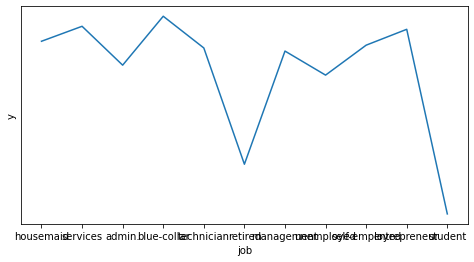

In [43]:
plt.figure(figsize =(8,4))
ax = sns.lineplot(x='job' , y='y' , data=df , ci=None)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.show()

- Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.
- Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.
- Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta
- Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.

Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza.